<a href="https://colab.research.google.com/github/SirAlekz/Laboration_1/blob/master/Slutuppgift_F2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inlämning Data Analytics slutuppgift 1: Utforska, analysera och prediktera på trafikdata

## Bakgrund

Du har fått jobb som data analytiker på ett startup bolag som vill börja sälja en tjänst till smarta städer. Affärsidén går ut på att förenkla polisens arbete genom att förutspå trafikhändelser. 

Som första steg i ditt arbete har du lokaliserat ett dataset med historik om incidenter i trafiken. Med detta dataset avser du testköra ett antal maskininlärningsmodeller för att utöka din kunskap om domänen och hitta lämpliga modeller som företaget kan använda. 

Datasetet finns också på det githubrepositorie som skapats för er för slutuppgift 1.

Det är valfritt om ni vill använda hela eller delar (sample) av detta dataset, **alla val ni gör behöver dock explicit beskrivas och motiveras**. Det kan vara klokt att enbart arbeta med ett sample eftersom detta dataset innehåller flera miljoner rader.

För ytterligare instruktioner, se presentationen av slutuppgift 1&2 som finns på Studium.

## Problembeskrivning

Du ska använda ditt dataset för att identifiera ett antal (minst 2) lämpliga frågor som är möjliga att genomföra på den data du har tillgång till.

De två frågorna ska vara av olika karaktär, exempelvis en prediktiv fråga som är av regressionskaraktär och en annan som är av klassificeringskaraktär, eller en klassificeringsfråga och en assoiationsanalysfråga, eller en regression och en klusterfråga. **Minst en fråga ska vara prediktiv, alltså övervakad inlärning (klassificering/regression)** 

Du ska testa minst 2 modeller för varje fråga, vilket innebär att du behöver testa minst 4 modeller totalt. 

Du vill använda ditt dataset för att identifiera vilken data som behövs för att kunna utveckla tjänsten samt för att utvärdera vilken kvalitet som krävs och hur pre-processing bör genomföras. I ditt arbete vill du också identidiera potentiella problem med dataset och analyser utifrån etiska aspekter. Denna kunskap ska sedan teoretiseras i uppgift 2.

Använd kunskaper du inhämtat tidigare under kursen, det är helt ok att använda kod från exempelvis tidigare laborationer och övningar som finns på kursens GitHub, eller hitta lämpliga algoritmexempel från nätet. 

1. **ID** - Unique identifier of the accident. 
2. **Source** - Indicates source of the accident report
3. **TMC** - A traffic accident may have a Traffic Message Changel code which provies more detailed description of the event. 
4. **Severity** - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic and 4 indicates a significant impact on traffic (long delay)
5. **Start_Time** - Start time of accident in local time zone. 
6. **End_Time** - End time of accident in local time zone. 
7. **Start_Lat** - Shows latitude in GPS coordinate of the start point.
8. **Start_Lng** - Shows longitude in GPS coordinate of the start point. 
9. **End_Lat** - Show latitude in GPS coordinate of end point. 
10. **End_Lng** - Shows longitude in GPS coordinate of end point. 
11. **Distance** - The length of the road extent affected by the accident. 
12. **Description** - Shows natural language description of the accident. 
13. **Number** - Shows the street number in adress field. 
14. **Street** - Shows the street name in adress field.
15. **Side** - Shows the relative side of the street in adress field.
16. **City** - Shows the city in adress field.
17. **County** - Shows the county in address field.
18. **State** - Shows the state in address field.
19. **Zipcode** - Shows the zipcode in address field.
20. **Country** - Shows the country in adress field.
21. **Timezone** - Shows the timezone based on the location of the accident.
22. Airport_code - Denotes an airport-based weather station which is the closest one to location of the accident.
23. Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).
24. Temperature(F) - Temperature in Fahrenheit. 
25. Wind_chill(F) - Shows the wind chill (Fahrenheit). 
26. Humidity - Shows the humidity (%)
27. Pressure - Shows the air pressure (in inches)
28. Visibility - Shows visibility (in miles)
29. Wind_Direction - Shows wind direction. 
30. Wind_Speed - Shows wind speed (in miles per hour)
31. Precipitation - Shows precipitation amount in inches, if there is any. 
32. Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog)
33. Amenity - A POI annotation which indicates presence of amenity in a nearby location. 
34. Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location. 
35. Crossing - A POI annotation which indicates presence of crossing in a nearby location. 
36. Give_Way - A POI annotation which indicates presence of give way in a nearby location. 
37. Junction - A POI annotation which indicates presence of junction in a nearby location. 
38. No_Exit - A POI annotation which indicates presence of no exit in a nearby location. 
39. Railway - A POI annotation which indicates presence of no exit in a nearby location. 
40. Roundabout - A POI annotion which indicates presence of a roundabout in a nearby location. 
41. Station - A POI annotation which indicates presence of a station in a nearby location. 
42. Stop - A POI annotation which indicates presence of a stop in a nearby location. 
43. Traffic_Calming - A POI annotation which indicates presence of traffic camling in a nearby location. 
44. Traffic_Signal - A POI annotation which indicates presence of traffic signal in a nearby location.
45. Turning_loop - A POI annotation which indicates presence of turning loop in a nearby location.
46. Sunrise_Sunset - Shows the period of day (day or night) based on civil twilight. 
47. Civil_Twilight - Shows the period of day (day or night) based on civil twiligt. 
48. Nautical_Twilight - Shows the period of day (day or night) based on nautical twilight. 
49. Astronomical_Twilight - Shows the period of day (day or night) based on astronomical twilight. 


# **FRÅGESTÄLLNING:**


### **1. Predict the severity based on weather information**
### 2. Cluster weather information and see if we can find any patterns 

This notebook will only treat question 1. 
The second question is treated in a seperate notebook. 


 

## Rättning

Uppgiften ger totalt 100 poäng, för godkänt behöver du minst 80 poäng. Hur många poäng varje deluppgift ger syns i varje del. 

In [1]:
# De importer du behöver göra ska finnas här
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#

from sklearn.preprocessing import StandardScaler

#Sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%matplotlib inline 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data collection

Ladda in ditt dataset (10 poäng).

In [4]:
#Read in the dataset. 
dataset = pd.read_csv('/content/drive/My Drive/DataAnalytics/Slutuppgift/US_Accidents_June20.csv')


#Filter the data based on California. 
dataset_ca = dataset[dataset['State'] == 'CA']


#Random sample 100_000 rows from the dataset. 
df = dataset_ca.sample(100_000, random_state=42)

In [5]:
#Explore the shape of the dataset. 
df.shape

(100000, 49)

In [6]:
#Explore the data
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3200930,A-3201090,Bing,NaN,2,2019-01-15 16:35:14,2019-01-15 17:05:14,34.171280,-118.515090,34.171280,-118.522700,0.435,At White Oak Ave/Exit 22 - Accident.,NaN,US-101 N,R,Encino,Los Angeles,CA,91316,US,US/Pacific,KVNY,2019-01-15 16:31:00,53.1,NaN,80.0,29.98,10.0,ESE,11.5,0.01,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3076186,A-3076346,Bing,NaN,2,2019-10-12 11:59:00,2019-10-12 13:15:06,33.534918,-117.171463,33.534918,-117.171463,0.000,At CA-79/Winchester Rd - Accident.,NaN,Escondido Fwy S,R,Murrieta,Riverside,CA,92562,US,US/Pacific,KF70,2019-10-12 11:55:00,81.0,81.0,9.0,28.46,10.0,SSW,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2655687,A-2655735,Bing,NaN,2,2017-03-03 18:21:52,2017-03-04 00:21:52,37.491100,-122.218630,37.487640,-122.207320,0.665,At CA-84/Woodside Rd/Exit 408 - Accident.,NaN,Bayshore Fwy S,R,Redwood City,San Mateo,CA,94063,US,US/Pacific,KSQL,2017-03-03 18:47:00,53.6,NaN,77.0,30.00,10.0,WNW,15.0,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
3099480,A-3099640,Bing,NaN,2,2019-10-30 08:51:00,2019-10-30 10:43:40,37.650442,-121.660682,37.650442,-121.660682,0.000,At Eagles Run Rd - Accident.,10901.0,Clifford Dr,L,Livermore,Alameda,CA,94550-9746,US,US/Pacific,KLVK,2019-10-30 08:53:00,49.0,45.0,19.0,29.72,10.0,ESE,10.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
955010,A-955036,MapQuest,201.0,2,2019-09-02 02:18:45,2019-09-02 04:30:20,33.549011,-117.801918,NaN,NaN,0.000,Accident on CA-1 Coast Hwy near San Joaquin St.,1500.0,N Coast Hwy,R,Laguna Beach,Orange,CA,92651-1343,US,US/Pacific,KSNA,2019-09-02 01:53:00,71.0,71.0,81.0,29.84,9.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,True,False,False,False,False,Night,Night,Night,Night


In [7]:
#Inspect the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3200930 to 1539750
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   TMC                    59305 non-null   float64
 3   Severity               100000 non-null  int64  
 4   Start_Time             100000 non-null  object 
 5   End_Time               100000 non-null  object 
 6   Start_Lat              100000 non-null  float64
 7   Start_Lng              100000 non-null  float64
 8   End_Lat                40695 non-null   float64
 9   End_Lng                40695 non-null   float64
 10  Distance(mi)           100000 non-null  float64
 11  Description            100000 non-null  object 
 12  Number                 21411 non-null   float64
 13  Street                 100000 non-null  object 
 14  Side                   100000

## Data preprocessing

Utvärdera kvaliteten på ert data och genomför nödvändig pre-processing för att adressera dessa kvalitetsbrister. Pre-processingen ska vara relevant för den fråga ni ska ställa, det innebär att ni förmodligen behöver olika pre-processing för era två olika frågor. (30 poäng).

*Hint: Tänk på om du behöver droppa kolumner som inte är relevanta, duplicerad data, saknad data, tänk också på vilken typ av data ni behöver beroende på vilka modeller ni planerar att använda*

In this question, we want to use the clustering algorithms to see if we can find any patterns. 

We will start of with filter the dataset, so our new dataframe only contains the columns we want to work with. 

In [8]:
#Filter the dataset based on the weather information we can get. 
df_ca = df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)']]

In [9]:
#Check the filtered dataset.
df_ca.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
3200930,53.1,NaN,80.0,29.98,10.0,11.5
3076186,81.0,81.0,9.0,28.46,10.0,3.0
2655687,53.6,NaN,77.0,30.00,10.0,15.0
3099480,49.0,45.0,19.0,29.72,10.0,10.0
955010,71.0,71.0,81.0,29.84,9.0,0.0


In [10]:
#Explore which datatypes the dataset contains.
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3200930 to 1539750
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(F)   97618 non-null  float64
 1   Wind_Chill(F)    41733 non-null  float64
 2   Humidity(%)      97456 non-null  float64
 3   Pressure(in)     98211 non-null  float64
 4   Visibility(mi)   97964 non-null  float64
 5   Wind_Speed(mph)  83750 non-null  float64
dtypes: float64(6)
memory usage: 5.3 MB


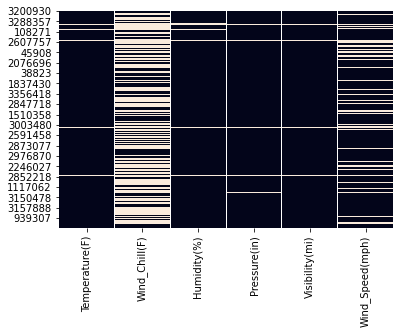

In [11]:
#Visualize the missing values of the dataset. 
sns.heatmap(df_ca.isna(), cbar=False)

In [12]:
df_ca.isna().sum()

Temperature(F)      2382
Wind_Chill(F)      58267
Humidity(%)         2544
Pressure(in)        1789
Visibility(mi)      2036
Wind_Speed(mph)    16250
dtype: int64

The first part is to explore the dataset, and then to make the dataset ready for the machine learning tasks. We want to handle outliers and missing values. 

First we want to see if our Temperature-column contains any outliers.
Then we want to remove these values, before we can assign the missing values with the median.

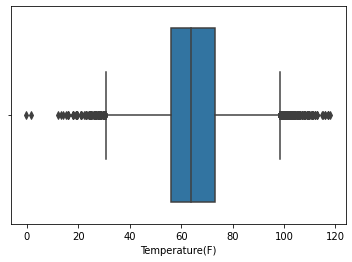

In [13]:
sns.boxplot(x=df_ca['Temperature(F)'])

In [14]:
df_ca[df_ca['Temperature(F)'] > 95].shape

(1334, 6)

We can see that we have 1334, values out of 100_000 that is outliers in our dataset. 

In [15]:
df_ca[df_ca['Temperature(F)'] < 30].shape

(155, 6)

We can se that we have 155 values that is below 30. 

We will delete the rows based on the condition ``Temperature > 90`` and ``Temperature < 30``, I consider them to be outliers. 

In [16]:
#Drop rows based on condition. 
df_ca.drop(df_ca[df_ca['Temperature(F)'] <= 30].index, inplace=True)
df_ca.drop(df_ca[df_ca['Temperature(F)'] > 95].index, inplace=True)

In [17]:
#Get the median of the median in median_temperature and assign to a new variable.
median_temp = df_ca['Temperature(F)'].mean()
median_temp

64.5999583745261

In [18]:
#Replace the missing data in Temperature with the median.
df_ca['Temperature(F)'].fillna(median_temp, inplace=True)

In [19]:
#Check the amount of missing value by column.
df_ca.isna().sum()

Temperature(F)         0
Wind_Chill(F)      57491
Humidity(%)         2537
Pressure(in)        1788
Visibility(mi)      2029
Wind_Speed(mph)    16188
dtype: int64

* The ``Wind_Chill(F)``-column will be dropped, because it has around 58% missing values. 
*  We have data about the weather condition, we don't need the column ``Weather_Condition``, this will we dropped as well. 

In [20]:
#Drop columns.
df_ca.drop('Wind_Chill(F)', axis=1, inplace=True)

In [21]:
df_ca.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
3200930,53.1,80.0,29.98,10.0,11.5
3076186,81.0,9.0,28.46,10.0,3.0
2655687,53.6,77.0,30.00,10.0,15.0
3099480,49.0,19.0,29.72,10.0,10.0
955010,71.0,81.0,29.84,9.0,0.0


In [22]:
#Check the sum of NaN. 
df_ca.isna().sum()

Temperature(F)         0
Humidity(%)         2537
Pressure(in)        1788
Visibility(mi)      2029
Wind_Speed(mph)    16188
dtype: int64

Now we want to see if the column ``Humidity(%)`` contains any outliers. We will display that by using a boxplot. 

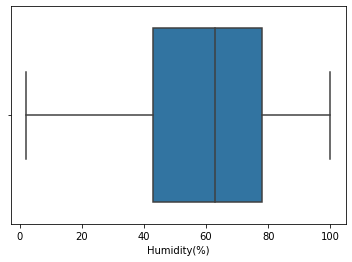

In [23]:
sns.boxplot(x=df_ca['Humidity(%)'])

We can see in the boxplot that our ``Humidity(%)`` dont contain any outliers. We have about 2.5% missing values in the ``Humidity(%)``-column. We will replace these missing values with the mean.

In [24]:
#Print information about the distribution of values in Humidity. 
print(df_ca['Humidity(%)'].mean())
print(df_ca['Humidity(%)'].median())
print(df_ca['Humidity(%)'].max())
print(df_ca['Humidity(%)'].min())

mean_humidityy = df_ca['Humidity(%)'].mean()

60.120419011882426
63.0
100.0
2.0


In [25]:
#Fill the missing values with 59 (mean value from Humidity-column.)
df_ca['Humidity(%)'].fillna(mean_humidityy, inplace=True)

Next we will look closer to the ``Pressure(in)``. 
From the boxplot we can see that we have outliers. We have to remove these values to proceed, and handle the NaN. 

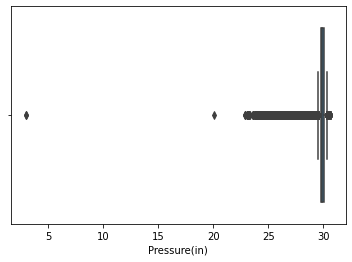

In [26]:
#Create a boxplot of Pressure(in)
sns.boxplot(x=df_ca['Pressure(in)'])

The column ``Presure(in)`` is containg outliers that has to be handled. 

In [27]:
df_ca[df_ca['Pressure(in)'] < 25].shape

(148, 5)

We will start of by dropping the values less than 25. 

In [28]:
#Drop values above 25 in pressure-column.
df_ca.drop(df_ca[df_ca['Pressure(in)'] < 25].index, inplace=True)
df_ca[df_ca['Pressure(in)'] < 25].shape

(0, 5)

Next we want to fill the NaN with the mean value. First we will print the information about the max, min and mean from the Temperature-column. 

In [29]:
#Check sum of missing values.
df_ca['Pressure(in)'].isna().sum()

1788

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


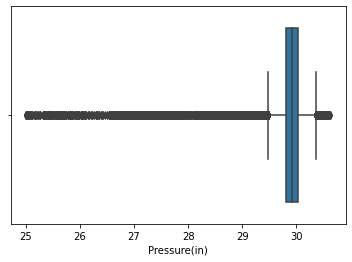

In [30]:
#Explore the distribution of values. 
sns.boxplot(df_ca['Pressure(in)'])

In [31]:
#Print info about pressure-column.
print(df_ca['Pressure(in)'].mean())
print(df_ca['Pressure(in)'].max())
print(df_ca['Pressure(in)'].min())


mean_pressure = df_ca['Pressure(in)'].mean()

29.809526522409623
30.63
25.0


In [32]:
#Fill missing values with mean of pressure. 
df_ca['Pressure(in)'].fillna(mean_pressure, inplace=True)

In [33]:
#Check sum of missing values.
df_ca.isna().sum()

Temperature(F)         0
Humidity(%)            0
Pressure(in)           0
Visibility(mi)      2029
Wind_Speed(mph)    16187
dtype: int64

Now we want to handle the Wind_Speed(mph)-column. The first thing we want to do as we have done with the previous exercises is to see if we have any outliers. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


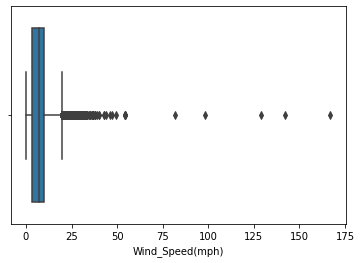

In [34]:
#Visulaize distribution of values in wind-speed column. 
sns.boxplot(df_ca['Wind_Speed(mph)'])

In [35]:
#See sum amount of values above 25. 
df_ca[df_ca['Wind_Speed(mph)'] > 25].shape

(310, 5)

The detected outliers (310) in the column will be removed. 

In [36]:
#Drop values above 25 in wind-speed column.
df_ca.drop(df_ca[df_ca['Wind_Speed(mph)'] > 25].index, inplace=True)
df_ca[df_ca['Wind_Speed(mph)'] > 25].shape

(0, 5)

We will now fill the NaN with the mean value. 

In [37]:
print(df_ca['Wind_Speed(mph)'].mean())
print(df_ca['Wind_Speed(mph)'].min())
print(df_ca['Wind_Speed(mph)'].max())

mean_wind_speed = df_ca['Wind_Speed(mph)'].mean()

df_ca['Wind_Speed(mph)'].fillna(mean_wind_speed, inplace=True)

7.082237999804087
0.0
25.0


In [38]:
df_ca.isna().sum()

Temperature(F)        0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)     2028
Wind_Speed(mph)       0
dtype: int64

In [39]:
print(df_ca['Visibility(mi)'].mean())
print(df_ca['Visibility(mi)'].min())
print(df_ca['Visibility(mi)'].max())

9.13587763436156
0.0
100.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


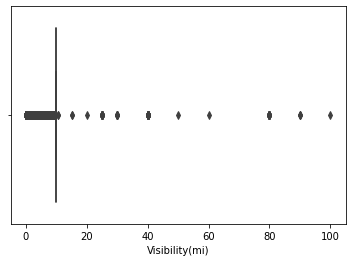

In [40]:
sns.boxplot(df_ca['Visibility(mi)'])

In [41]:
df_ca.drop(df_ca[df_ca['Visibility(mi)'] > 25].index, inplace=True)

In [42]:
df_ca[df_ca['Visibility(mi)'] < 8].shape

(14101, 5)

We can see from the boxplot that we have a lot of values that is above, the box (line), so in this case we will keep the values and then just fill the nan with a the mean. 

In [43]:
median_visibility = df['Visibility(mi)'].median()
median_visibility

10.0

In [44]:
#Fillna with mean value in column. 
df_ca.loc[:, "Visibility(mi)"].fillna(median_visibility, inplace=True)

The majority of our values in Visibility(mi) is 10.0. 

In [45]:
print(df_ca['Visibility(mi)'].value_counts()[:5])

10.0    77549
7.0      3514
9.0      3501
8.0      2792
6.0      2273
5.0      2151
Name: Visibility(mi), dtype: int64


In [46]:
df_ca.isna().sum()

Temperature(F)     0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Speed(mph)    0
dtype: int64

In [47]:
df_ca.shape

(97964, 5)

## Utforska och visualisera data (descriptiv statistics)
Producera statistik från ert dataset. Utforska data genom att använda visualiering, och demonstrera att ni behörskar ett antal olika sätt att visualisera data i grafiskt form. Minst ett histogram och ett spridningsdiagram ska uppvisas i denna del för full poäng. (20 poäng).

Check for inbalance: 

In [48]:
# Kod för descriptiv statistik här.

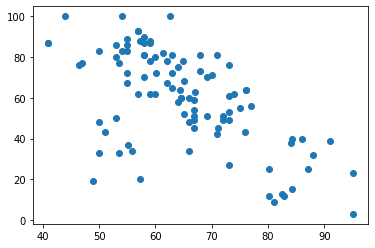

In [49]:
plt.scatter(x=df_ca['Temperature(F)'][:100], y=df_ca['Humidity(%)'][:100])

In [50]:
#Create an empty list to append values based on for loop.
temp_group = []

for value in df_ca['Temperature(F)']: 

  """
  For every row in Temp-column. 
  Check temp and append value to the 
  empty list. 

  """

  if value <= 10: 
    temp_group.append("0-10")
  elif value > 10 and value <= 20: 
    temp_group.append("10-20")
  elif value > 20 and value < 30: 
    temp_group.append("20-30")
  elif value > 30 and value <= 40: 
    temp_group.append("30-40")
  elif value > 40 and value < 50: 
    temp_group.append("40-50")
  elif value > 50 and value <= 60: 
    temp_group.append("50-60")
  elif value > 60 and value < 70: 
    temp_group.append("60-70")
  elif value > 70 and value <= 80: 
    temp_group.append("70-80")
  elif value > 80 and value < 90: 
    temp_group.append("80-90")
  else: 
    temp_group.append("90-100")



In [51]:
#Convert the list to a pandas Series. 
s_temp_group = pd.Series(temp_group)

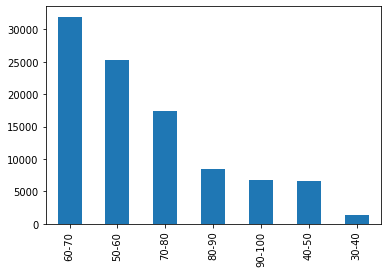

In [52]:
#Count the elements in the list and barplot the result. 
s_temp_group.value_counts().plot(kind='bar')

We have grouped the values in the temperature column and displayed them above. 
The temperature between 60-70 Fahrenheit is the most common among our rows in the dataset. We could see this before when we assigned the missing values with the mean of the column, which was in that range. 

In [53]:
windspeed_group = []

for value in df_ca['Wind_Speed(mph)']: 

  if value <= 5: 
    windspeed_group.append("0-5")
  elif value > 5 and value <= 10: 
    windspeed_group.append("5-10")
  elif value > 10 and value <= 15: 
    windspeed_group.append("10-15")
  elif value > 15 and value <= 20: 
    windspeed_group.append("15-20")
  else: 
    windspeed_group.append("20+")

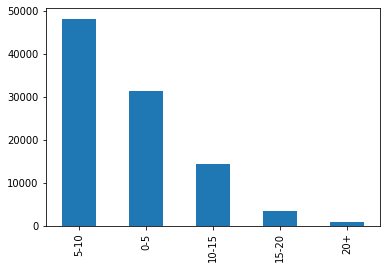

In [54]:
windspeed_series = pd.Series(windspeed_group)

windspeed_series.value_counts().plot(kind='bar')

In [55]:
windspeed_series.value_counts(normalize=True)

5-10     0.491058
0-5      0.318627
10-15    0.146676
15-20    0.034257
20+      0.009381
dtype: float64

We can see from the barchart above that the majority of the values is between 5-10, about 49%. 

In [56]:
visi_group = []

for value in df_ca['Visibility(mi)']:

  if value <= 20: 
    visi_group.append("0-20")
  elif value > 20 and value <= 40:
    visi_group.append("20-40") 
  elif value > 40 and value <= 60: 
    visi_group.append("40-60")
  elif value > 60 and value <= 80: 
    visi_group.append("60-80")
  else: 
    visi_group.append("80+")

visi_series = pd.Series(visi_group)

visi_series.value_counts()

0-20     97948
20-40       16
dtype: int64

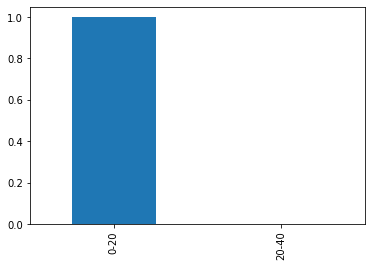

In [57]:
visi_series.value_counts(normalize=True).plot(kind='bar')

In [58]:
df_ca.corr()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Temperature(F),1.000000,-0.651541,-0.076064,0.235530,0.196060
Humidity(%),-0.651541,1.000000,0.106880,-0.382490,-0.171454
Pressure(in),-0.076064,0.106880,1.000000,0.022819,0.042697
Visibility(mi),0.235530,-0.382490,0.022819,1.000000,0.083925
Wind_Speed(mph),0.196060,-0.171454,0.042697,0.083925,1.000000


## Modellering

Skapa modeller från ert dataset. Testa och träna. Minst två modeller per fråga, alltså 4 modeller totalt. (20 poäng)

In [59]:
df_ca.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
3200930,53.1,80.0,29.98,10.0,11.5
3076186,81.0,9.0,28.46,10.0,3.0
2655687,53.6,77.0,30.00,10.0,15.0
3099480,49.0,19.0,29.72,10.0,10.0
955010,71.0,81.0,29.84,9.0,0.0


In [60]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97964 entries, 3200930 to 1539750
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(F)   97964 non-null  float64
 1   Humidity(%)      97964 non-null  float64
 2   Pressure(in)     97964 non-null  float64
 3   Visibility(mi)   97964 non-null  float64
 4   Wind_Speed(mph)  97964 non-null  float64
dtypes: float64(5)
memory usage: 4.5 MB


### Check for skewness in dataset

It's important to handle skewness in the dataset when we want to perform clustering. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

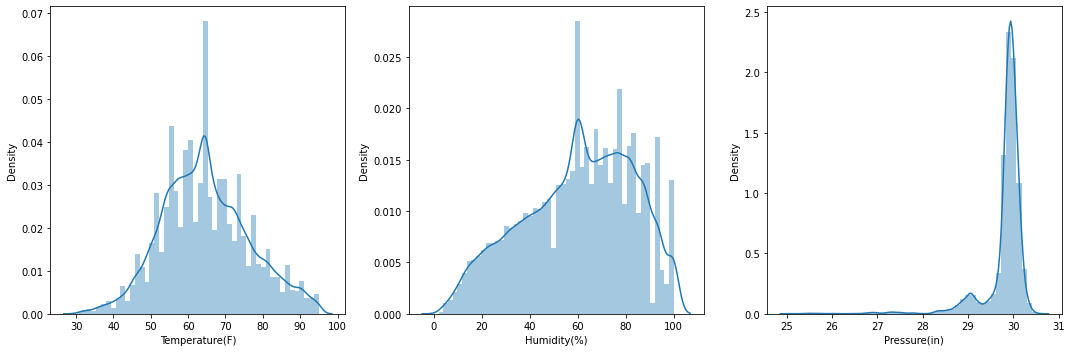

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(df_ca['Temperature(F)'], ax=ax[0])
sns.distplot(df_ca['Humidity(%)'], ax=ax[1])
sns.distplot(df_ca['Pressure(in)'], ax=ax[2])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


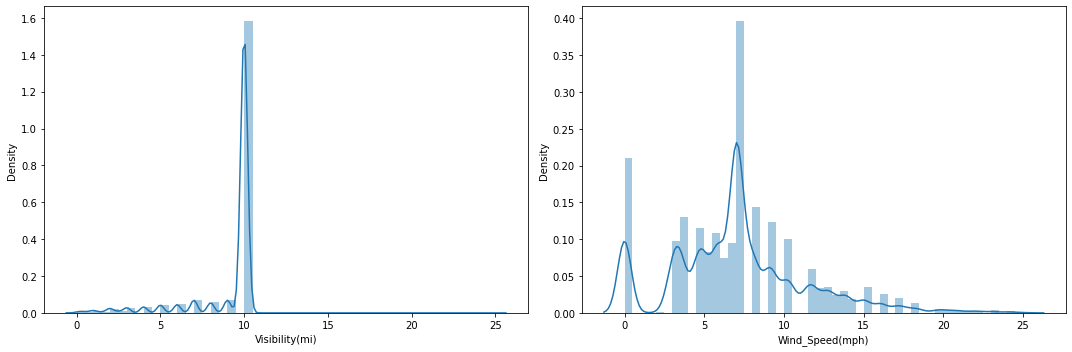

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(df_ca['Visibility(mi)'], ax=ax[0])
sns.distplot(df_ca['Wind_Speed(mph)'], ax=ax[1])
plt.tight_layout()
plt.show()

In [63]:
df_ca.skew()

Temperature(F)     0.220976
Humidity(%)       -0.334834
Pressure(in)      -4.069688
Visibility(mi)    -2.424132
Wind_Speed(mph)    0.699804
dtype: float64

In [64]:
df_ca['Wind_Speed(mph)'].max()

25.0

In [65]:
from scipy import stats
df_fix = pd.DataFrame() 
df_fix['Temperature(F)'] = stats.boxcox(df_ca['Temperature(F)'])[0]
df_fix['iHumidity(%)'] = stats.boxcox(df_ca['Humidity(%)'])[0]
df_fix['Pressure(in)'] = stats.boxcox(df_ca['Pressure(in)'])[0]
df_fix['Visibility(mi)'] = pd.Series(np.cbrt(df_ca['Visibility(mi)'])).values
df_fix['Wind_Speed(mph)'] = df_ca['Wind_Speed(mph)']

In [66]:
df_fix.tail()

,Temperature(F),iHumidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
97959,16.161013,146.856303,2.392989e+78,2.154435,NaN
97960,11.978539,174.144272,2.308484e+78,1.442250,NaN
97961,18.471746,60.416582,1.826352e+78,2.154435,NaN
97962,15.099074,140.654929,1.729987e+78,2.154435,NaN
97963,12.396696,73.410474,2.308484e+78,2.154435,NaN


In [67]:
#Doublecheck the missing values.
df_fix.isna().sum()

Temperature(F)         0
iHumidity(%)           0
Pressure(in)           0
Visibility(mi)         0
Wind_Speed(mph)    86292
dtype: int64

In [68]:
#Explore skewness in dataset.
df_fix.skew()

Temperature(F)    -0.001486
iHumidity(%)      -0.204258
Pressure(in)      -0.137581
Visibility(mi)    -3.595235
Wind_Speed(mph)    1.390410
dtype: float64

In [69]:
df_fix['Wind_Speed(mph)'].fillna(df_fix['Wind_Speed(mph)'].mean(), inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df_fix)
df_normalized = scaler.fit_transform(df_fix)
print(df_normalized.mean(axis = 0).round(2))
print(df_normalized.std(axis = 0).round(2))

[-0.  0.  0. -0.  0.]
[1. 1. 1. 1. 1.]


Before we perform our clustering, we have to make sure that our data set are working with has clustering tendency and does not contain unformly distributed points is very important. If the data does not contain clustering tendency, then clusters identified by any state of the art clustering algorithms may be irrelevant. Non-uniform distribution of points in data set becomes important in clustering. 

We can solve this by the Hopkins test, a statistical test for spatial randomness of a variable can be used to measure the probability of data points generated by uniform data distribution. 

The Hopkins Test is unfortunatly out of my knowledge and because this task is timelimited, I've not focused on understanding and implementing how to use the test.

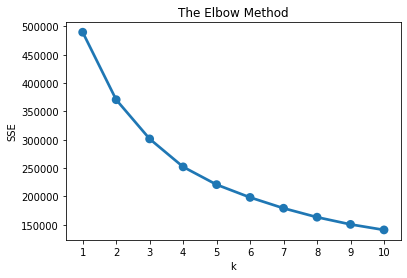

In [71]:
from sklearn.cluster import KMeans

sse = {} #sum of squared error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Getting the optimal number of clusters is very significant in the analysis. If k is too high, each point will broadly start representing a cluster and if k is to low, then data points are incorrectly clustered. Finding the optimal number of clusters lead to granularity in clustering. 

There is no definitive answer for finding right number of cluster as it depends upon: 

* Domain Knowledge - might give some prior knowledge on finding number of clusters. 

* Data driven approach - if the domain knowledge is not available, mathematical methods help in finding out right number of clusters. 

We have used the elbow method. The intuition behind the elbow curve is that the explained variation changes raipidly until the number of groups you have in the data then it slows down leading to and elbow formation. We want to find a linear trend. Based on the visaluzation, our number of cluster is 4, because that is where the point which the distortion start decreasing in a linear fashion in my opinion. 

In [72]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_normalized)
model.labels_.shape

(97964,)

The goal by clustering data isn't just to make clusters, it's to make good clusters.

In [73]:
df_ca['Cluster'] = model.labels_

In [74]:
df_ca['Cluster'].value_counts()

4    32236
1    30635
0    25937
3     7382
2     1774
Name: Cluster, dtype: int64

In [75]:
df['Severity'].value_counts()

2    70783
3    27428
4     1063
1      726
Name: Severity, dtype: int64

In [76]:
km_predict = model.predict(df_normalized)
km_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

Now when the clustering is done, how well the clustering has performed can be quantified by a number of metrics. There are majorly two types of measures to access the clusterings performance. 

* Extrinsic Measures - which require ground truth labels. Examples are Adjusted Rand index, Fowlkes-Mallows score, Mutual information based scores, Homogeneity, Completeness and V-measure. 

* Intrinsic Measures - that does not require ground truth labels. Some of the clustering performance measures are silhouette coefficient, calinski-harabasz index and Davies-Bouldin Index etc. 

### Second clustering technique 

# MeanShift

In [77]:
from sklearn.cluster import MeanShift

In [78]:
#Exclude the column (Cluster) that we previously assigned to the DataFrame.
df_meanshift = df_ca.iloc[:,:-1]

In [79]:
#Copy the dataframe, to prevent warning indication. 
df_fix_meanshift = df_fix.copy()
df_meanshift_normalized = df_normalized.copy()


In [80]:
#Create a meanshift object. 
ms = MeanShift() 

#Fit the first 1 000 rows to the model.
ms.fit(df_meanshift_normalized[:1000])

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [81]:
#Explore the shape.
ms.labels_.shape

(1000,)

## Utvärdering

Jämför minst två modeller för varje av dina två frågor och fyra olika modeller totalt. För full poäng ska dessutom flera mått på kvalitet användas. (20 poäng)

In [82]:
#kod för att jämföra

The two methods we will use to measure the cluster quality is: 

* Inhertia - Intuitvely, inertia tells how far away the points within a cluster are. Therefore, a small inertia is aimed for. The range of inertia's value starts from zero and goes up. 

* Silhouette score - tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1. 

The best value is 1 and the worst is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. 

In [83]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [84]:
silhouette_score(df_normalized, kmeans.labels_)

0.26704208030697435

In [85]:
model.inertia_ 

220776.51061479136

In [86]:
from sklearn.metrics import adjusted_rand_score

In [87]:
print(adjusted_rand_score(km_predict, kmeans.labels_))

0.3781563165003386


Advantage with Adjusted Rand Index 

Given the knowledge of the ground truth class assigments labels_true and our clustering algorithm assigments of the sam

In [88]:
#Test with random forest on the cluster! 

In [89]:
X, y = df_ca_copy.iloc[:,:-1] , df_ca_copy.iloc[:,-1]

clf = RandomForestClassifier(n_estimators=100).fit(X, y)

NameError: ignored

# Conclusion

After I've computed clustering on this data set. 

In our data set we all ready have an exisiting class ``Severity``, it is often better to use the existing class if your data set contains one than trying to create one. Clustering only  makes sense if the way the data is unable to organize or doesn't contain any classes. 

The second reason why this data s

Many clustering algorithms, K-Means for example use a distance measurement to calculate the similarity between the observations. Because of this, certain clustering algorithms will perform better with continous attributes. Howevere, if you have categorical data, you can one-hot encode the attributes or using clustering algorithms built for categorical data, such K-Modes. It should be noted that it does not make a lot of sense to calculate distance between binary vairables. 

Our dataset contain categorical values initialy, but are the data pre processing we deleted those column because we only wanted to perforom our analysis on the weather data. 

# What does my data look like? 

If we visualise the data, it looks like the following. 

In [ ]:
plt.scatter(x=df_ca['Temperature(F)'][:10000], y=df_ca['Humidity(%)'][:10000])

In [ ]:
plt.scatter(x=df_ca['Pressure(in)'][:10000], y=df_ca['Visibility(mi)'][:10000])

After we have run several clustering algorithms on our data, no distinct or meningful groups were formed and it was determind that these attributes were not well suited for clustering. However, by simply visulizing our data early in the analysis. 

When we visulize the data set it reveals that our data set has no amount of separation or dinstinct group, which means for this case that clustering may not be appropriate. 